In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Reading data

In [2]:
data = pd.read_csv("FT Global Business School MBA Ranking 2023.csv")

In [3]:
data.head()

,Rank,School Name,Female faculty (%),International mobility rank,Salary today (US$) **,International students (%),Weighted salary (US$),International board (%),Value for money rank,Audit year *,...,Careers service rank,Overall satisfaction **,Carbon footprint rank,Rank in 2022,Faculty with doctorates (%),Female students (%),International course experience rank,Women on board (%),Rank in 2021,Three-year average rank
0,1,Columbia Business School,26,49,"228,425",57,"226,359",39,80,"2,019",...,23,9.51,53,2.0,96,44,48,19,NaN,NaN
1,2,Insead,22,9,"202,568",95,"198,363",89,15,"2,020",...,43,9.31,53,3.0,99,36,7,50,1.0,2.0
2,3,Iese Business School,33,19,"182,278",88,"181,270",90,92,"2,022",...,5,9.61,6,10.0,100,37,5,29,4.0,6.0
3,4,Harvard Business School,33,58,"235,177",38,"235,019",0 ‡,89,"2,018",...,20,9.69,14,3.0,88,46,57,0 ‡,NaN,NaN
4,4,Stanford Graduate School of Business,26,56,"253,435",46,"248,669",25,72,"2,022",...,11,9.98,53,6.0,89,44,27,31,NaN,NaN


### Checking dataframe shape

In [4]:
data.shape

(100, 28)

### Checking data types

In [5]:
data.dtypes

Rank                                      int64
School Name                              object
Female faculty (%)                        int64
International mobility rank               int64
Salary today (US$) **                    object
International students (%)                int64
Weighted salary (US$)                    object
International board (%)                  object
Value for money rank                      int64
Audit year *                             object
Career progress rank                      int64
FT research rank                          int64
Aims achieved (%)                         int64
Sector diversity rank                     int64
Location, by primary campus              object
Alumni network rank                       int64
International faculty (%)                object
ESG and net zero teaching rank            int64
Careers service rank                      int64
Overall satisfaction **                 float64
Carbon footprint rank                   

Some columns that should be int64 are objects

In [6]:
data[['Salary today (US$) **','Weighted salary (US$)','International board (%)','Audit year *','International faculty (%)','Women on board (%)']].head(10)

,Salary today (US$) **,Weighted salary (US$),International board (%),Audit year *,International faculty (%),Women on board (%)
0,"228,425","226,359",39,"2,019",58,19
1,"202,568","198,363",89,"2,020",90,50
2,"182,278","181,270",90,"2,022",73,29
3,"235,177","235,019",0 ‡,"2,018",40,0 ‡
4,"253,435","248,669",25,"2,022",45,31
5,"192,815","192,815",77,"2,019",45,46
6,"213,321","213,321",33,"2,017",49,43
7,"192,164","193,293",39,"2,017",48,25
8,"211,718","209,337",27,"2,019",51,44
9,"199,332","196,659",46,"2,018",44,24


Seems US$ columns have commas and there is a symbol in % columns

### Selecting columns and "cleaning" them

In [7]:
cols = ['Salary today (US$) **','Weighted salary (US$)','International board (%)','Audit year *','International faculty (%)','Women on board (%)']

for col in cols:
    data[col] = data[col].str.replace(',','')
    data[col] = data[col].str.replace(' ‡','')
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
data.head(5)

,Rank,School Name,Female faculty (%),International mobility rank,Salary today (US$) **,International students (%),Weighted salary (US$),International board (%),Value for money rank,Audit year *,...,Careers service rank,Overall satisfaction **,Carbon footprint rank,Rank in 2022,Faculty with doctorates (%),Female students (%),International course experience rank,Women on board (%),Rank in 2021,Three-year average rank
0,1,Columbia Business School,26,49,228425,57,226359,39.0,80,2019.0,...,23,9.51,53,2.0,96,44,48,19,NaN,NaN
1,2,Insead,22,9,202568,95,198363,89.0,15,2020.0,...,43,9.31,53,3.0,99,36,7,50,1.0,2.0
2,3,Iese Business School,33,19,182278,88,181270,90.0,92,2022.0,...,5,9.61,6,10.0,100,37,5,29,4.0,6.0
3,4,Harvard Business School,33,58,235177,38,235019,0.0,89,2018.0,...,20,9.69,14,3.0,88,46,57,0,NaN,NaN
4,4,Stanford Graduate School of Business,26,56,253435,46,248669,25.0,72,2022.0,...,11,9.98,53,6.0,89,44,27,31,NaN,NaN


### Checking distribution of selected columns

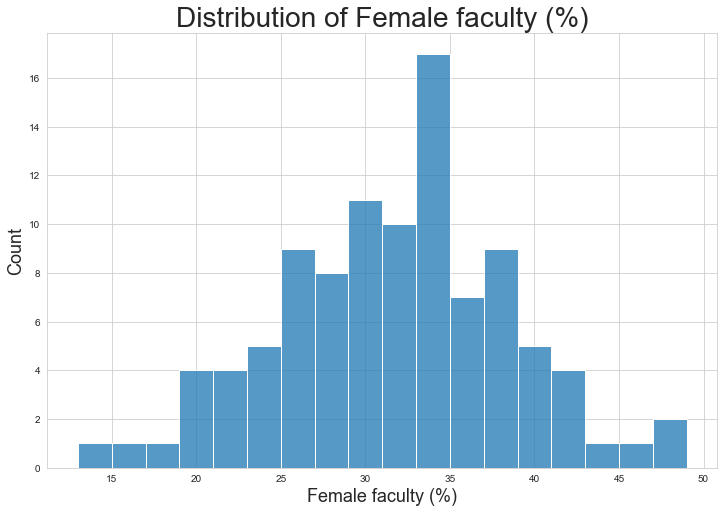

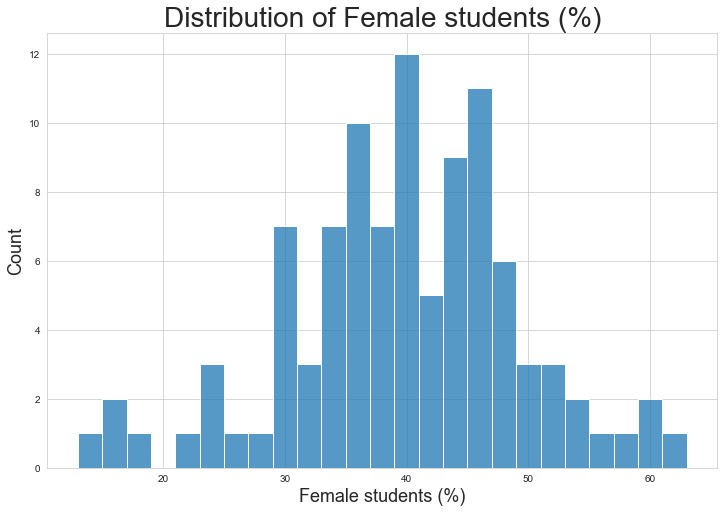

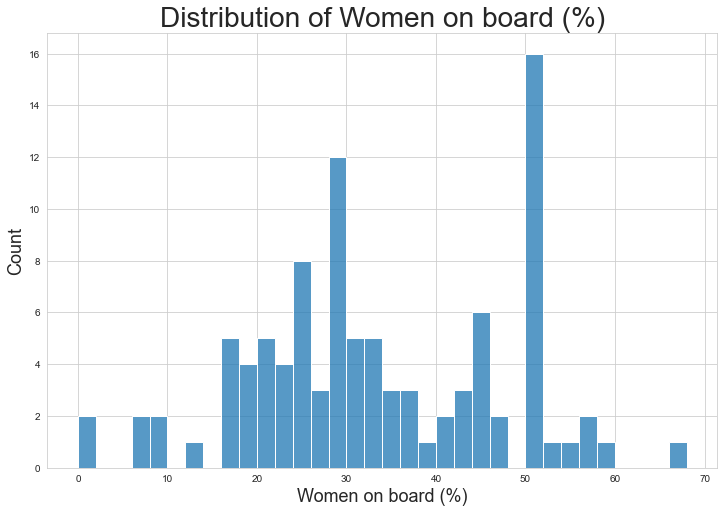

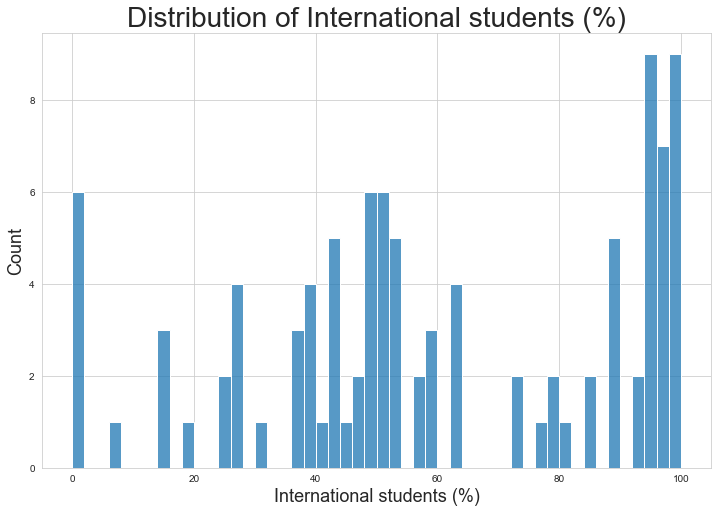

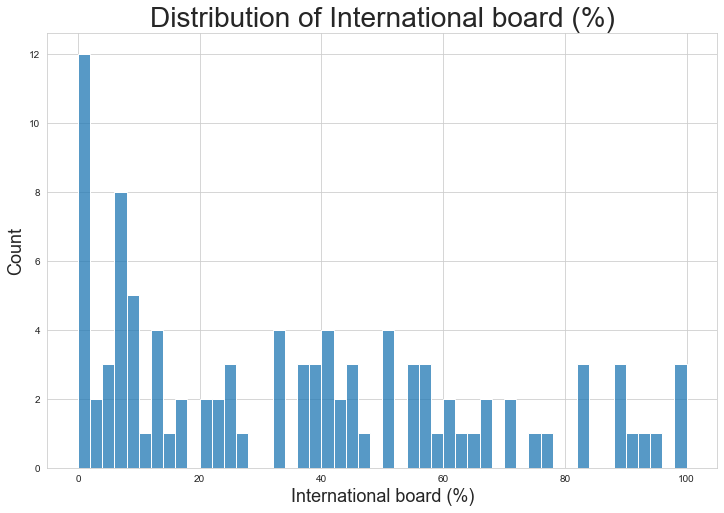

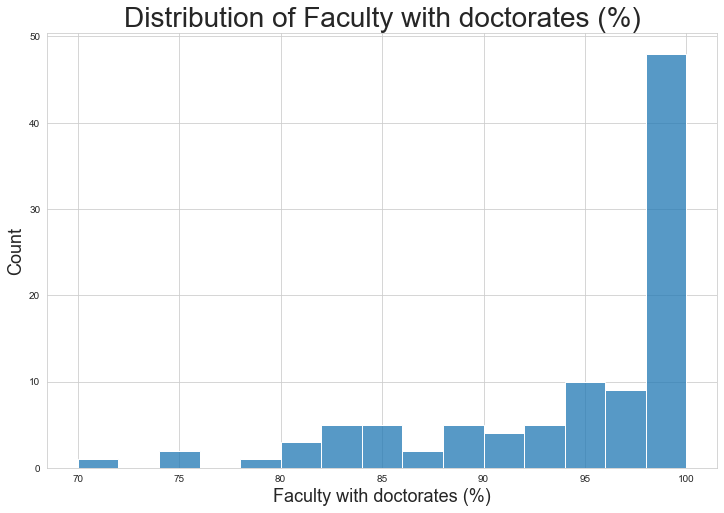

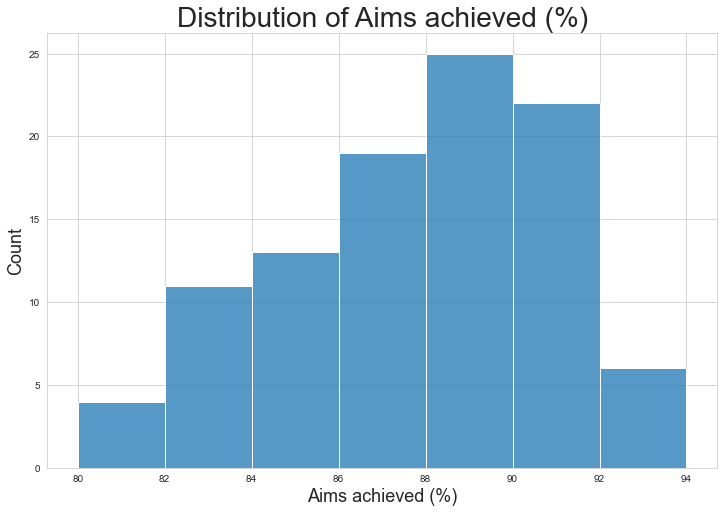

In [8]:
cols = ['Female faculty (%)','Female students (%)','Women on board (%)','International students (%)','International board (%)','Faculty with doctorates (%)','Aims achieved (%)']

for col in cols:
    fig,ax = plt.subplots(figsize=(12,8))
    ax = sns.histplot(data=data, x=col,binwidth=2)
    ax.axes.set_title('Distribution of ' + col,fontsize=28)
    ax.set_ylabel('Count',fontsize=18)
    ax.set_xlabel(col,fontsize=18)
    plt.show()

### Checking salary distribution

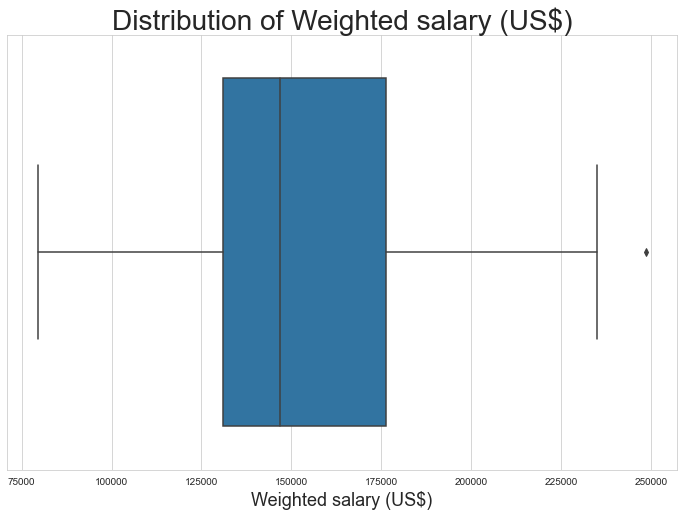

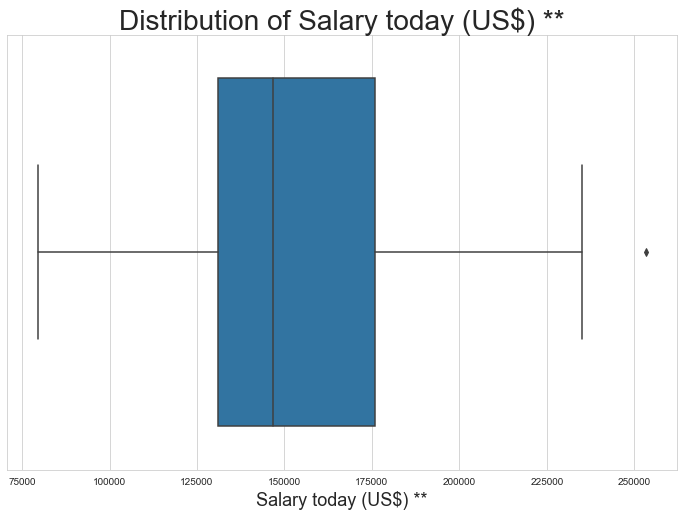

In [9]:
cols = ['Weighted salary (US$)','Salary today (US$) **']

for col in cols:
    fig,ax = plt.subplots(figsize=(12,8))
    ax = sns.boxplot(data = data,x = col)
    ax.axes.set_title('Distribution of ' + col,fontsize=28)
    ax.set_xlabel(col,fontsize=18)
    plt.show()

### Check correlation between selected columns

Text(0.5, 1.0, 'Correlation matrix')

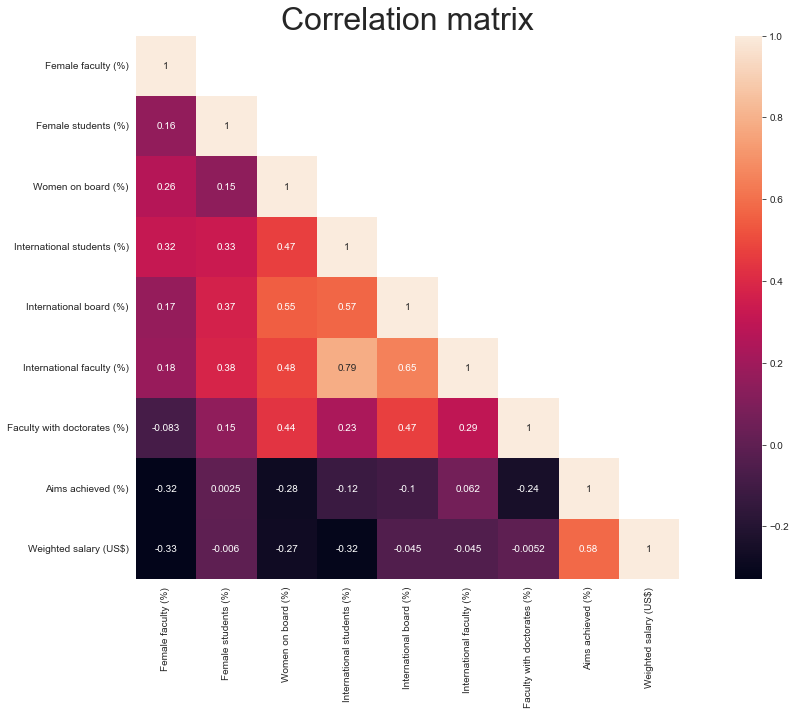

In [10]:
selected_data = data[['Female faculty (%)','Female students (%)','Women on board (%)','International students (%)','International board (%)','International faculty (%)','Faculty with doctorates (%)','Aims achieved (%)','Weighted salary (US$)']]
df_cat = pd.get_dummies(selected_data)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)
ax.axes.set_title("Correlation matrix",fontsize=32)

There is a strong correlation between international students, board and faculty (expected I guess). There is also a positive correlation between weighted salary and aims achieved (completing objectives is rewarded with higher salaries?).

### Checking top 10 schools by rank

In [11]:
top_10 = data.sort_values(by='Rank',ascending=True).head(10)

top_10[['Rank', 'School Name', 'Location, by primary campus']]

,Rank,School Name,"Location, by primary campus"
0,1,Columbia Business School,US
1,2,Insead,France/Singapore
2,3,Iese Business School,Spain
3,4,Harvard Business School,US
4,4,Stanford Graduate School of Business,US
5,6,SDA Bocconi School of Management,Italy
6,7,University of California at Berkeley: Haas,US
7,8,Cornell University: Johnson,US
8,9,"Northwestern University, Kellogg School of Man...",US
9,10,Yale School of Management,US


### Checking previous rankings for top 10 schools

In [12]:
top_10[['School Name','Rank','Rank in 2022','Rank in 2021','Three-year average rank']]

,School Name,Rank,Rank in 2022,Rank in 2021,Three-year average rank
0,Columbia Business School,1,2.0,NaN,NaN
1,Insead,2,3.0,1.0,2.0
2,Iese Business School,3,10.0,4.0,6.0
3,Harvard Business School,4,3.0,NaN,NaN
4,Stanford Graduate School of Business,4,6.0,NaN,NaN
5,SDA Bocconi School of Management,6,13.0,12.0,10.0
6,University of California at Berkeley: Haas,7,14.0,NaN,NaN
7,Cornell University: Johnson,8,17.0,15.0,13.0
8,"Northwestern University, Kellogg School of Man...",9,5.0,6.0,7.0
9,Yale School of Management,10,9.0,4.0,8.0


### Checking which are the top 10 schools in other rankings

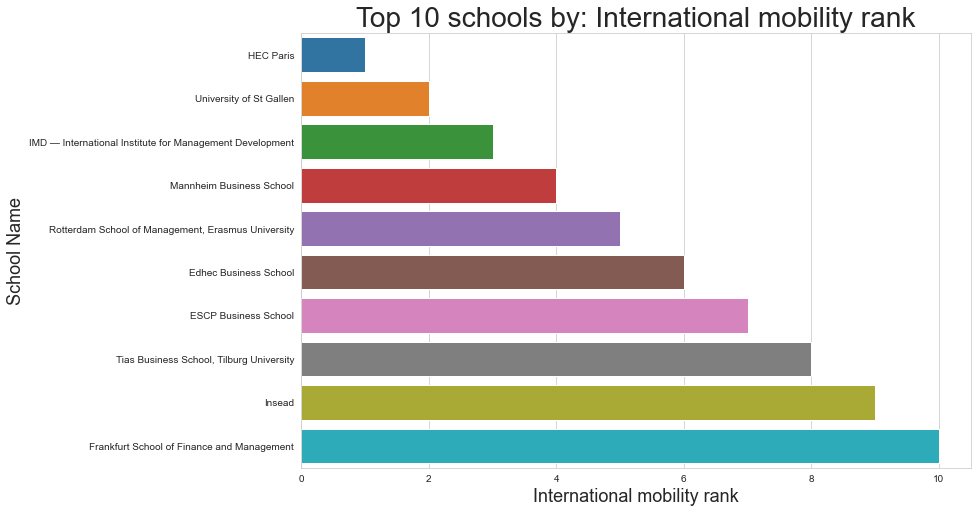

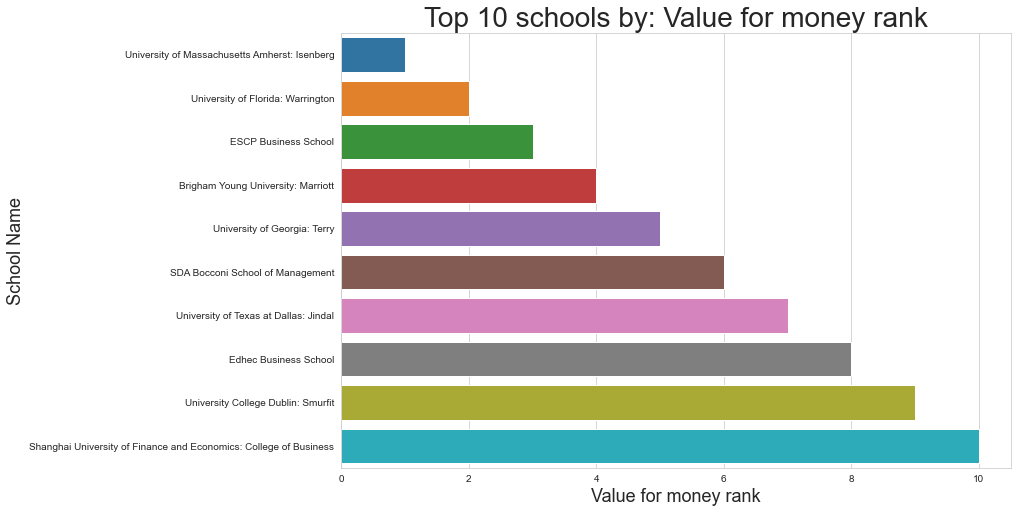

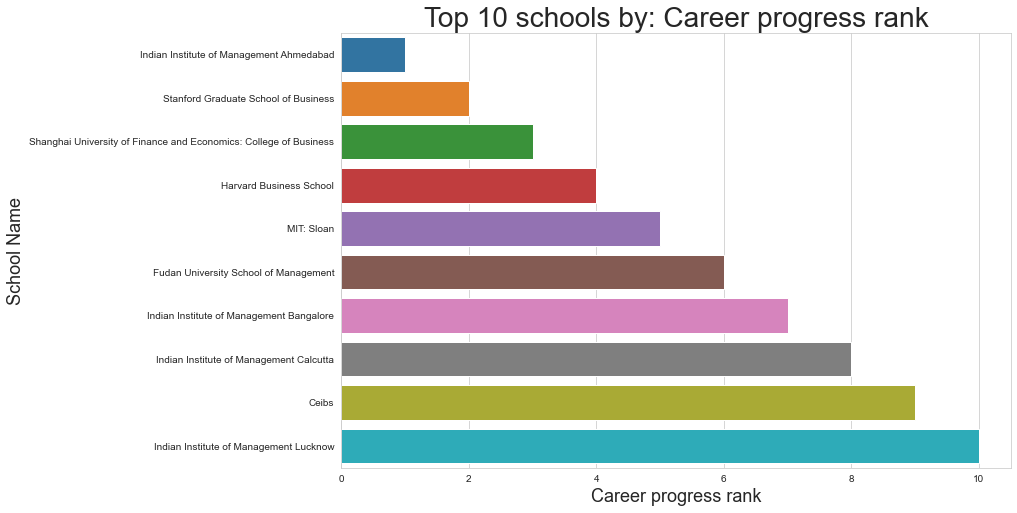

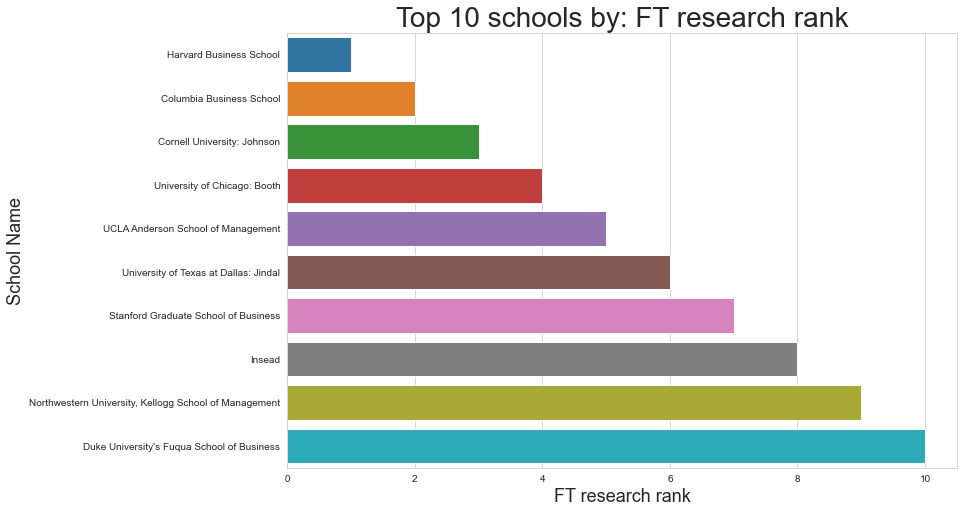

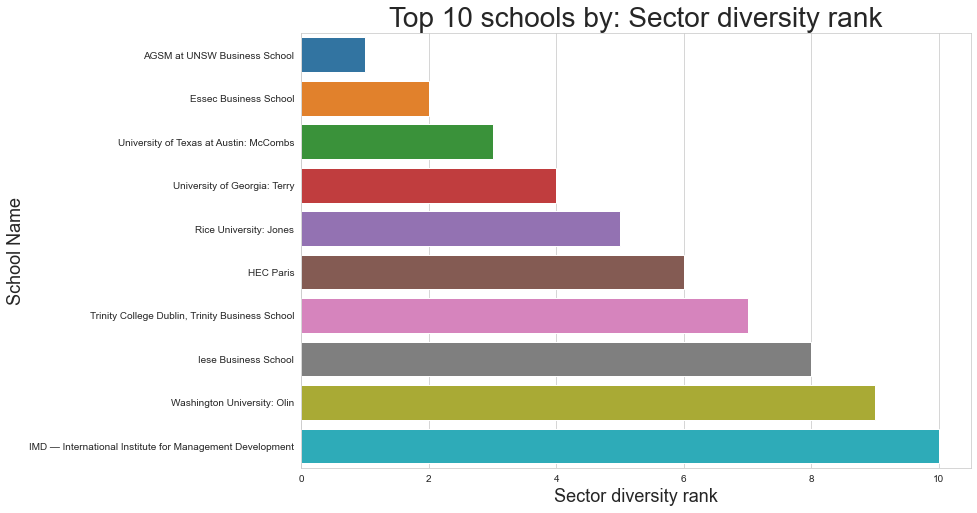

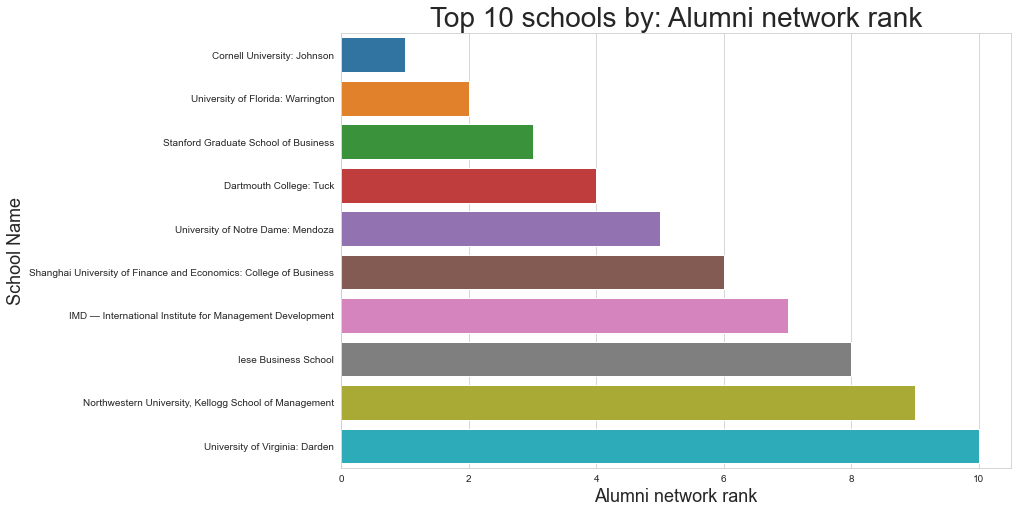

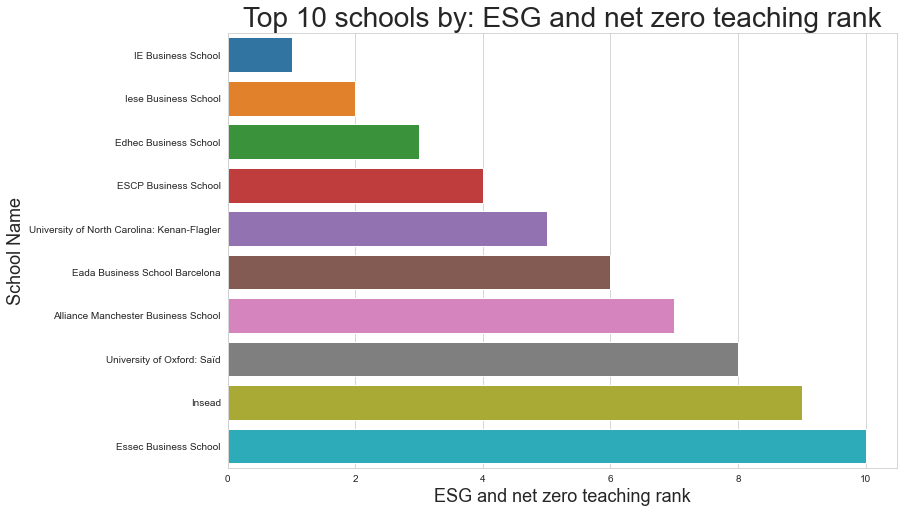

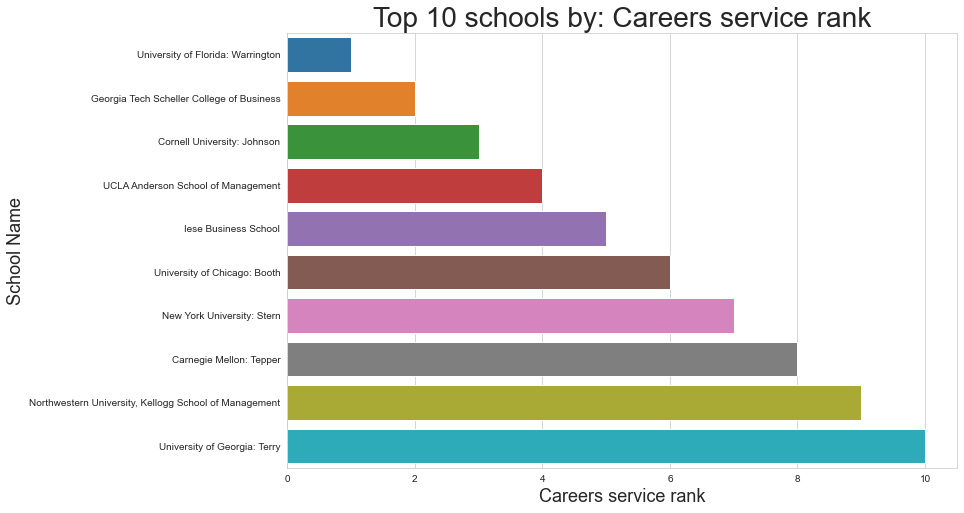

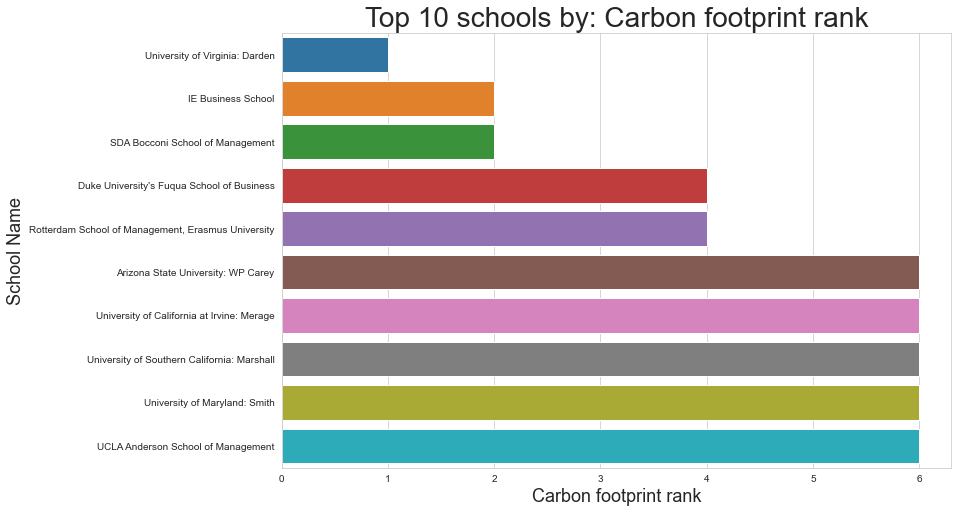

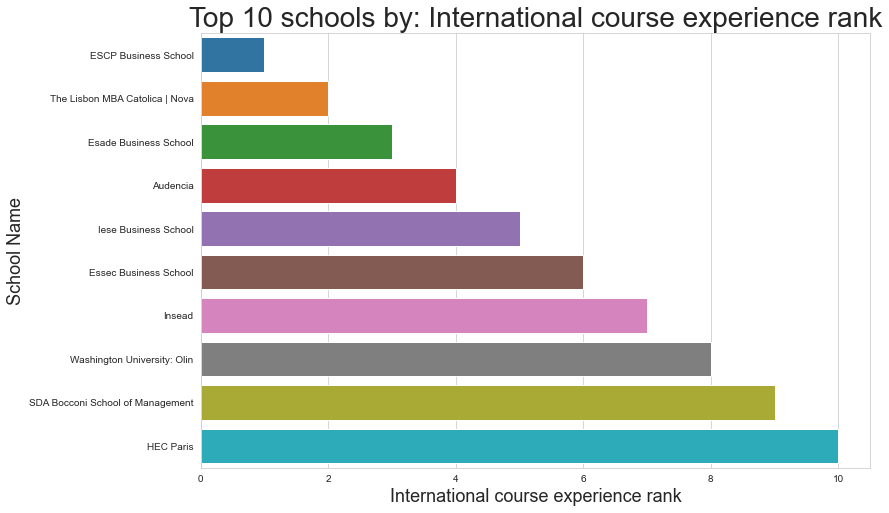

In [13]:
cols = ['International mobility rank','Value for money rank','Career progress rank','FT research rank','Sector diversity rank','Alumni network rank','ESG and net zero teaching rank','Careers service rank','Carbon footprint rank','International course experience rank']

for col in cols:
    info = data.sort_values(by=col,ascending=True)[['School Name',col]].head(10)
    fig,ax = plt.subplots(figsize=(12,8))
    ax = sns.barplot(data=info, y='School Name', x=col,orient='h')
    ax.axes.set_title('Top 10 schools by: ' + col,fontsize=28)
    ax.set_xlabel(col,fontsize=18)
    ax.set_ylabel('School Name',fontsize=18)
    plt.show()

### Checking other rankings for top 10 schools

In [14]:
top_10[['Rank','School Name','International mobility rank','Value for money rank','Career progress rank','FT research rank','Sector diversity rank','Alumni network rank','ESG and net zero teaching rank','Careers service rank','Carbon footprint rank','International course experience rank']]

,Rank,School Name,International mobility rank,Value for money rank,Career progress rank,FT research rank,Sector diversity rank,Alumni network rank,ESG and net zero teaching rank,Careers service rank,Carbon footprint rank,International course experience rank
0,1,Columbia Business School,49,80,15,2,79,18,78,23,53,48
1,2,Insead,9,15,38,8,84,22,9,43,53,7
2,3,Iese Business School,19,92,16,54,8,8,2,5,6,5
3,4,Harvard Business School,58,89,4,1,97,26,87,20,14,57
4,4,Stanford Graduate School of Business,56,72,2,7,97,3,28,11,53,27
5,6,SDA Bocconi School of Management,32,6,58,22,11,46,33,18,2,9
6,7,University of California at Berkeley: Haas,34,74,22,14,62,35,42,39,6,49
7,8,Cornell University: Johnson,70,69,52,3,76,1,79,3,32,39
8,9,"Northwestern University, Kellogg School of Man...",68,88,23,9,39,9,17,9,53,35
9,10,Yale School of Management,55,86,26,11,45,21,15,44,32,36


Seems that top 10 schools are usually ranked high in some categories but in others they fall in the middle, and there are some schools ranked much lower that have higher overall satisfaction than these schools

### Checking salary in top 10 schools

In [15]:
top_10[['Rank','School Name','Weighted salary (US$)','Salary today (US$) **']]

,Rank,School Name,Weighted salary (US$),Salary today (US$) **
0,1,Columbia Business School,226359,228425
1,2,Insead,198363,202568
2,3,Iese Business School,181270,182278
3,4,Harvard Business School,235019,235177
4,4,Stanford Graduate School of Business,248669,253435
5,6,SDA Bocconi School of Management,192815,192815
6,7,University of California at Berkeley: Haas,213321,213321
7,8,Cornell University: Johnson,193293,192164
8,9,"Northwestern University, Kellogg School of Man...",209337,211718
9,10,Yale School of Management,196659,199332


### Checking overall satisfaction in top 10 schools and in general

In [16]:
top_10[['Rank','School Name','Overall satisfaction **']]

,Rank,School Name,Overall satisfaction **
0,1,Columbia Business School,9.51
1,2,Insead,9.31
2,3,Iese Business School,9.61
3,4,Harvard Business School,9.69
4,4,Stanford Graduate School of Business,9.98
5,6,SDA Bocconi School of Management,9.28
6,7,University of California at Berkeley: Haas,9.02
7,8,Cornell University: Johnson,9.94
8,9,"Northwestern University, Kellogg School of Man...",9.59
9,10,Yale School of Management,9.25


In [17]:
data.sort_values(by='Overall satisfaction **',ascending=False)[['Rank','School Name','Overall satisfaction **']].head(10)

,Rank,School Name,Overall satisfaction **
4,4,Stanford Graduate School of Business,9.98
7,8,Cornell University: Johnson,9.94
56,57,University of Maryland: Smith,9.71
17,17,University of Virginia: Darden,9.71
39,40,University of Florida: Warrington,9.71
14,15,Dartmouth College: Tuck,9.70
3,4,Harvard Business School,9.69
23,23,Shanghai University of Finance and Economics: ...,9.67
71,71,University of Notre Dame: Mendoza,9.63
2,3,Iese Business School,9.61


Seems that some schools that are ranked lower have higher overall satisfaction.

### Checking correlation between selected columns

Text(0.5, 1.0, 'Correlation matrix')

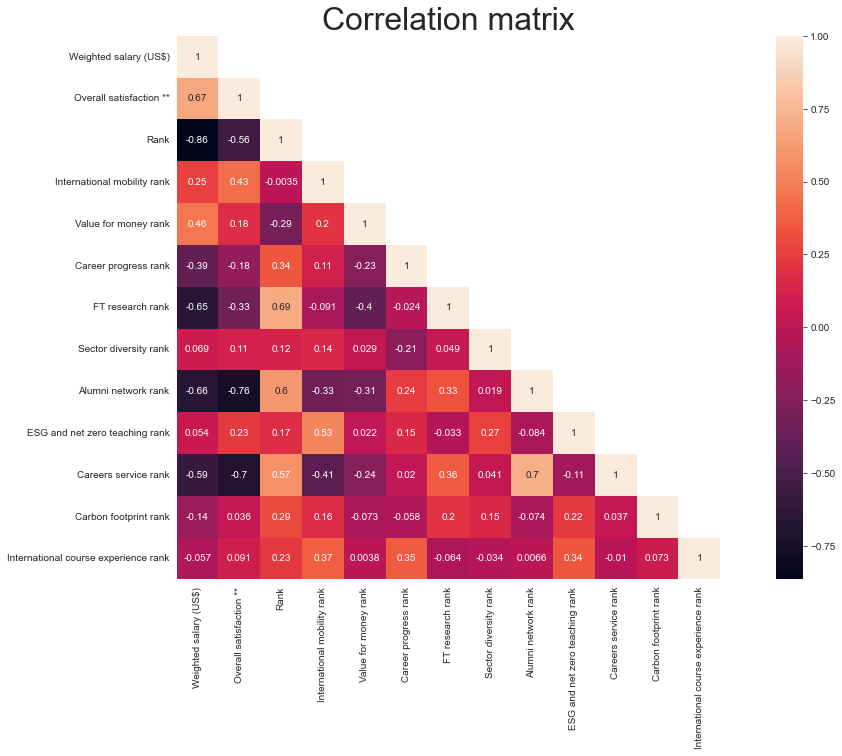

In [18]:
selected_data = data[['Weighted salary (US$)','Overall satisfaction **','Rank','International mobility rank','Value for money rank','Career progress rank','FT research rank','Sector diversity rank','Alumni network rank','ESG and net zero teaching rank','Careers service rank','Carbon footprint rank','International course experience rank']]
df_cat = pd.get_dummies(selected_data)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)
ax.axes.set_title("Correlation matrix",fontsize=32)

Note: In correlations that involve a rank, remember lower numerical rank is better (rank number 1 is better than rank 50) so negative correlations mean higher rank and positive correlations mean lower rank.

Seems weighted salary and overall satisfaction are positively correlated (money gives satisfaction!?). This two columns are also correlated with a higher rank.
Rank columns seems to have a higher correlation to alumni network rank, carreers service rank and FT research rank (this might mean that these rankings are the most important when determining the main rank value).
We can also see that better carreers service rank and alumni network rank are correlated between each other, as well as being correlated to weighted salary and overall satisfaction.

### Checking salaries by location

In [19]:
locations = data.groupby('Location, by primary campus')

salaries = locations['Weighted salary (US$)'].describe().round(2).sort_values(by='mean',ascending=False)
salaries

,count,mean,std,min,25%,50%,75%,max
"Location, by primary campus",,,,,,,,
Italy,1.0,192815.00,NaN,192815.0,192815.00,192815.0,192815.00,192815.0
US,46.0,169783.17,31822.06,128013.0,143058.25,167655.0,193033.75,248669.0
China,3.0,165497.67,23828.50,138087.0,157609.50,177132.0,179203.00,181274.0
India,6.0,157034.33,17198.13,136673.0,146839.00,157119.0,160376.75,186420.0
Switzerland,2.0,156632.00,20483.47,142148.0,149390.00,156632.0,163874.00,171116.0
France/Singapore,2.0,154225.00,62420.56,110087.0,132156.00,154225.0,176294.00,198363.0
Spain,4.0,152460.25,32562.80,105971.0,144399.50,161300.0,169360.75,181270.0
Singapore,3.0,146268.00,17501.59,127153.0,138649.00,150145.0,155825.50,161506.0
UK,10.0,141995.50,26773.34,101555.0,121975.00,140729.5,161441.25,182254.0


Looks like Italy has the highest average weighted salary, but only has one school in this ranking. Let's see how this table looks with countries with more than one schools in this ranking.

In [20]:
salaries[salaries['count']>1]

,count,mean,std,min,25%,50%,75%,max
"Location, by primary campus",,,,,,,,
US,46.0,169783.17,31822.06,128013.0,143058.25,167655.0,193033.75,248669.0
China,3.0,165497.67,23828.50,138087.0,157609.50,177132.0,179203.00,181274.0
India,6.0,157034.33,17198.13,136673.0,146839.00,157119.0,160376.75,186420.0
Switzerland,2.0,156632.00,20483.47,142148.0,149390.00,156632.0,163874.00,171116.0
France/Singapore,2.0,154225.00,62420.56,110087.0,132156.00,154225.0,176294.00,198363.0
Spain,4.0,152460.25,32562.80,105971.0,144399.50,161300.0,169360.75,181270.0
Singapore,3.0,146268.00,17501.59,127153.0,138649.00,150145.0,155825.50,161506.0
UK,10.0,141995.50,26773.34,101555.0,121975.00,140729.5,161441.25,182254.0
Hong Kong,3.0,140017.67,13158.03,132346.0,132421.00,132496.0,143853.50,155211.0


The US has the highest average weighted salary, but as it has the highest amount of schools in the ranking, the standard deviation is very high, this seems to happen in the UK as well, with India being the third country with most schools (although signifacantly lower schools than the US) and not having such a high standard deviation.